# Effects of ProsperLoan Characterics on Various Features
## by Emmanuelaudu Joshua


## Investigation Overview

In this investigation, I wanted to look at the characteristics  to study their relationship on borrowers's APR. The main characterics are BorrowerAPR, ProsperScore, EmploymentStatus, LoanStatus and LoanOriginalAmount

## Dataset Overview

The final dataset after preparation contains 83,982 loans with 16 features (including LoanOriginalAmount, LoanStatus, BorrowerState, BorrowerAPR, StatedMonthlyIncome, ProsperRating (Alpha), Occupation, EmploymentStatus, DebtToIncomeRatio, MonthlyLoanPayment, TotalTrades, Investors, year, month, day, time.

In [26]:
#import all packages and set plots to be embedded inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load the dataset
# expand maximun number of columns and row dosplayed

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
loan_sb = pd.read_csv(r'C:\Users\hp\Documents\ALX Files\Data Viz\Project\LoanData_cleaned.csv')


## Distribution of the LoanStatus

About 89% of all Prosper loans are either current or completed which we can assume that they have good profiles. Also, about 8% of Prosper's loans were charged-off or defaulted. Moreover, the remaining 2.4% of loans has the status Past Due and was grouped under a single status: Past Due.

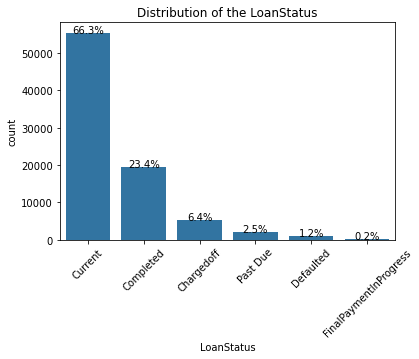

In [3]:
# Print the proportion below the bars 
loans_n=loan_sb['LoanStatus'].value_counts().sum()
status_count=loan_sb['LoanStatus'].value_counts()
status_order=status_count.index

base_color = sns.color_palette()[0]
sns.countplot(data=loan_sb, x='LoanStatus', color=base_color, order=status_order);

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=45) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = status_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/loans_n)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    
    plt.title('Distribution of the LoanStatus');

## Distribution of the BorrowerAPR

The visualization shown depicts that the BorrowerAPR is multimodal. A small peak at 0.10, and a large peak at 0.20. There is a very significant peak between 0.30 and 0.40. There are few loans after the 0.40 level.

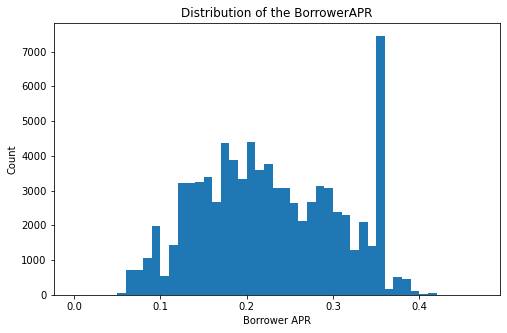

In [5]:
bins = np.arange(0, loan_sb.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_sb, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('Count')
plt.title('Distribution of the BorrowerAPR');
plt.show()

## Relationship between the Years and LoanOriginalAmount

It is clearly seen that total amount of Loan collected by borrowers over the years has been on a steady increase.

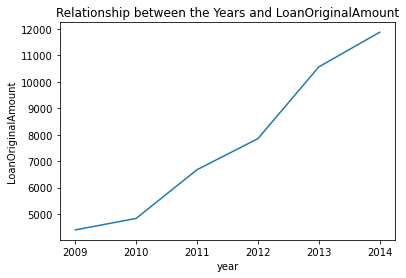

In [6]:
sns.lineplot(data=loan_sb.sort_values(by='year'), x='year', y='LoanOriginalAmount', ci=None);
plt.title('Relationship between the Years and LoanOriginalAmount');

## Relationship between `Employment Status` and `months`

It can be seen that `Employed` and`Self-employed` borrowers, borrow more money in *January* but the `Full-time` borrowers are more in *July*

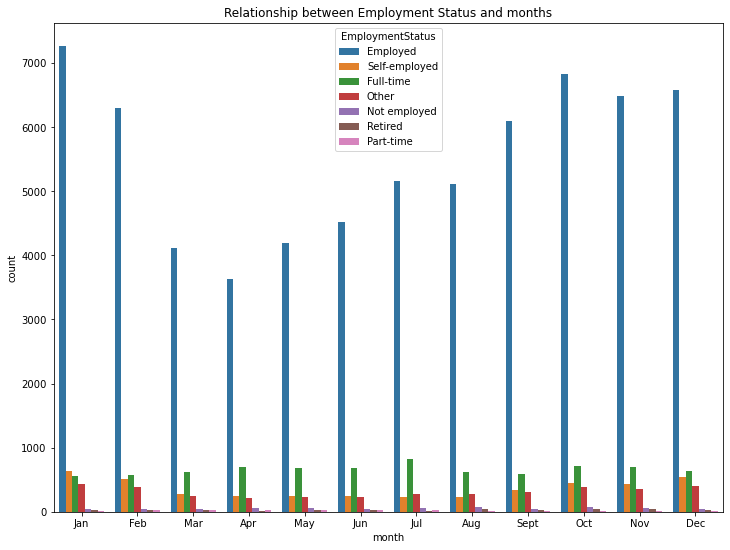

In [7]:
plt.figure(figsize = [12, 9])
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 
              'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
ordered_variable = pd.api.types.CategoricalDtype(ordered = True, categories = month_order)
loan_sb['month'] = loan_sb['month'].astype(ordered_variable)
sns.countplot(data = loan_sb.sort_values(by='month'), x = 'month', hue = 'EmploymentStatus')
plt.title('Relationship between Employment Status and months');
plt.show()

## A look on how the `ProsperRating` have  effects on relationship of  `BorrowerAPR` and `LoanOriginalAmount`

>* The LoanOriginalAmount increases with higher ProsperRating. 
>* The BorrowerAPR decreases with higher ProsperRating. 
>* The relationship between BorroweAPR and LoanOriginalAmount turns from negative to slightly positive when the ProsperRating increases from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

<Figure size 72x72 with 0 Axes>

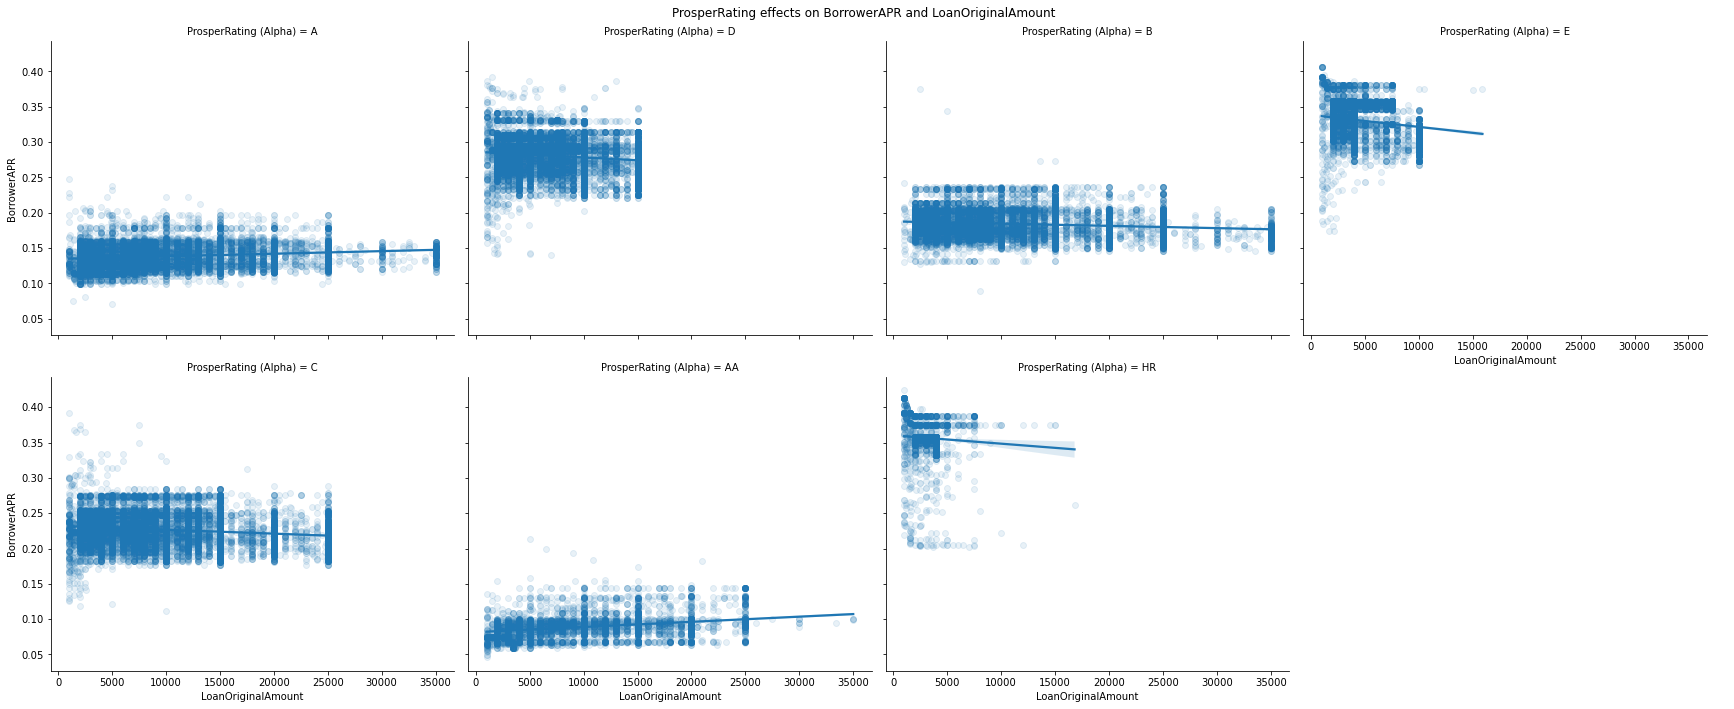

In [28]:
plt.figure(figsize=(1,1))
h=sns.FacetGrid(data=loan_sb, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
h.fig.suptitle('ProsperRating effects on BorrowerAPR and LoanOriginalAmount')
h.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
h.add_legend();

In [2]:
!jupyter nbconvert Exploration_Part2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Exploration_Part2.ipynb to slides
[NbConvertApp] Writing 971517 bytes to Exploration_Part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\hp\AppData\Local\Programs\Python\Python310\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py",